In [7]:
import os
import pickle
import numpy as np
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import ModelCheckpoint

In [8]:
def load_and_preprocess_data(train_dir, test_dir, img_size=(64, 64), batch_size=32):
    # Data augmentation for the training set
    train_datagen = ImageDataGenerator(
        rescale=1.0/255,
        rotation_range=20,
        width_shift_range=0.2,
        height_shift_range=0.2,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        fill_mode='nearest'
    )

    # Only rescaling for the test set
    test_datagen = ImageDataGenerator(rescale=1.0/255)

    # Create the data generators
    train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    test_generator = test_datagen.flow_from_directory(
        test_dir,
        target_size=img_size,
        batch_size=batch_size,
        class_mode='categorical'
    )

    return train_generator, test_generator

In [9]:
def build_model(input_shape=(64, 64, 3), num_classes=4):
    model = Sequential([
        Conv2D(32, (3, 3), activation='relu', input_shape=input_shape),
        MaxPooling2D(2, 2),
        Conv2D(64, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Conv2D(128, (3, 3), activation='relu'),
        MaxPooling2D(2, 2),
        Flatten(),
        Dense(256, activation='relu'),
        Dropout(0.5),
        Dense(num_classes, activation='softmax')
    ])
    return model

In [10]:
def compile_and_train_model(model, train_generator, test_generator, epochs=20, save_path='../model/brain_tumor_model.h5'):
    os.makedirs(os.path.dirname(save_path), exist_ok=True)
    
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    checkpoint = ModelCheckpoint(save_path, monitor='val_accuracy', save_best_only=True, verbose=1)

    history = model.fit(
        train_generator,
        epochs=epochs,
        validation_data=test_generator,
        callbacks=[checkpoint]
    )

    return history

In [18]:
train_dir = '../data/Training'
test_dir = '../data/Testing'
processed_data_dir = '../data/processed'
model_save_path = '../model/brain_tumor_model.keras'
img_size = (64, 64)
batch_size = 32
epochs = 20

In [14]:
train_generator, test_generator = load_and_preprocess_data(
    train_dir=train_dir,
    test_dir=test_dir,
    img_size=img_size,
    batch_size=batch_size
)

Found 5712 images belonging to 4 classes.
Found 1311 images belonging to 4 classes.


In [15]:
model = build_model(input_shape=(64, 64, 3), num_classes=4)
model.summary()

c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4608)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,179,904 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,274,180 (4.86 MB)

 Trainable params: 1,274,180 (4.86 MB)

 Non-trainable params: 0 (0.00 B)

In [19]:
history = compile_and_train_model(
    model,
    train_generator,
    test_generator,
    epochs=epochs,
    save_path=model_save_path
)

Epoch 1/20


c:\Users\USER\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 238ms/step - accuracy: 0.3937 - loss: 1.2268
Epoch 1: val_accuracy improved from -inf to 0.36003, saving model to ../model/brain_tumor_model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 55s 271ms/step - accuracy: 0.3943 - loss: 1.2260 - val_accuracy: 0.3600 - val_loss: 2.6551
Epoch 2/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 239ms/step - accuracy: 0.6454 - loss: 0.8760
Epoch 2: val_accuracy improved from 0.36003 to 0.37757, saving model to ../model/brain_tumor_model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 48s 261ms/step - accuracy: 0.6454 - loss: 0.8759 - val_accuracy: 0.3776 - val_loss: 2.1605
Epoch 3/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 228ms/step - accuracy: 0.6681 - loss: 0.7994
Epoch 3: val_accuracy improved from 0.37757 to 0.42487, saving model to ../model/brain_tumor_model.keras
179/179 ━━━━━━━━━━━━━━━━━━━━ 46s 250ms/step - accuracy: 0.6681 - loss: 0.7994 - val_accuracy: 0.4249 - val_loss: 1.8332
Epoch 4/20
179/179 ━━━━━━━━━━━━━━━━━━━━ 0s 232ms/step - accuracy: 0.6984 - 

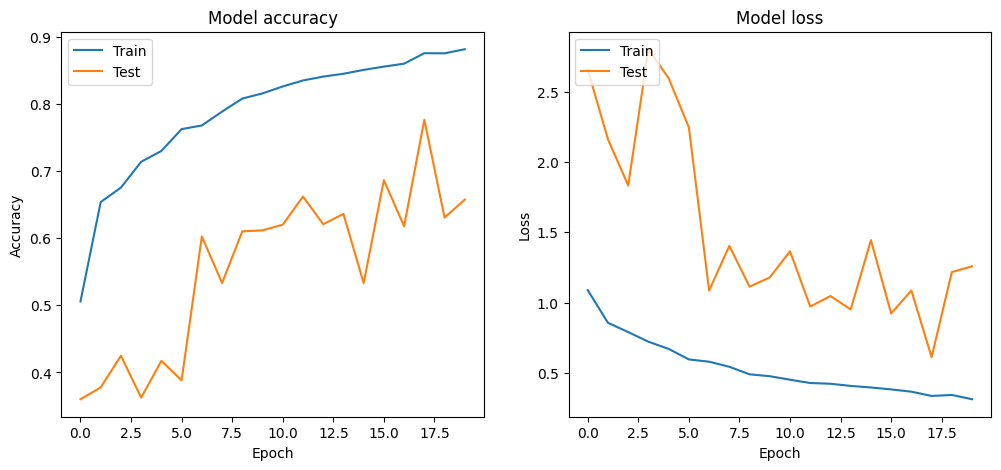

In [20]:
import matplotlib.pyplot as plt

def plot_training_history(history):
    # Plot training & validation accuracy values
    plt.figure(figsize=(12, 5))
    plt.subplot(1, 2, 1)
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
    plt.title('Model accuracy')
    plt.xlabel('Epoch')
    plt.ylabel('Accuracy')
    plt.legend(['Train', 'Test'], loc='upper left')

    # Plot training & validation loss values
    plt.subplot(1, 2, 2)
    plt.plot(history.history['loss'])
    plt.plot(history.history['val_loss'])
    plt.title('Model loss')
    plt.xlabel('Epoch')
    plt.ylabel('Loss')
    plt.legend(['Train', 'Test'], loc='upper left')

    plt.show()

plot_training_history(history)